In [1]:
# modules import
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

In [2]:
# Open data

# Buoyancy flux
netCDF_NEMO_fileT = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/NETCDF_fluxes_TEMP.nc'
netCDF_NEMO_fileP = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/NETCDF_fluxes_PREC.nc'
netCDF_NEMO_fileW = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/NETCDF_fluxes_WIND.nc'
netCDF_NEMO_fileTOT = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fluxes/NETCDF_fluxes_TOTAL.nc'

FLXT = xr.open_mfdataset(netCDF_NEMO_fileT)
FLXT['year']= FLXT.time.dt.year
FLXT_mean = FLXT.where(FLXT.year > 1988).mean('time')
FLXT_mean['Buoyancy'] = - 9.81/3974 * FLXT_mean['alpha'] * FLXT_mean['hfxout'] + 9.81 * FLXT_mean['beta'] * (FLXT_mean['empmr']) * FLXT_mean['S_surface']

FLXP = xr.open_mfdataset(netCDF_NEMO_fileP)
FLXP['year']= FLXP.time.dt.year
FLXP_mean = FLXP.where(FLXP.year > 1988).mean('time')
FLXP_mean['Buoyancy'] = - 9.81/3974 * FLXP_mean['alpha'] * FLXP_mean['hfxout'] + 9.81 * FLXP_mean['beta'] * (FLXP_mean['empmr']) * FLXP_mean['S_surface'] 

FLXW = xr.open_mfdataset(netCDF_NEMO_fileW)
FLXW['year']= FLXW.time.dt.year
FLXW_mean = FLXW.where(FLXW.year > 1988).mean('time')
FLXW_mean['Buoyancy'] = - 9.81/3974 * FLXW_mean['alpha'] * FLXW_mean['hfxout'] + 9.81 * FLXW_mean['beta'] * (FLXW_mean['empmr']) * FLXW_mean['S_surface'] 

FLXTOT = xr.open_mfdataset(netCDF_NEMO_fileTOT)
FLXTOT['year']= FLXTOT.time.dt.year
FLXTOT_mean = FLXTOT.where(FLXTOT.year > 1988).mean('time')
FLXTOT_mean['Buoyancy'] = - 9.81/3974 * FLXTOT_mean['alpha'] * FLXTOT_mean['hfxout'] + 9.81 * FLXTOT_mean['beta'] * (FLXTOT_mean['empmr']) * FLXTOT_mean['S_surface'] 

# Melting
netCDF_NEMO_MELTW_file = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_totale/NETCDF_MELT_MEAN_WIND.nc'
netCDF_NEMO_MELTP_file = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_totale/NETCDF_MELT_MEAN_PREC.nc'
netCDF_NEMO_MELTT_file = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_totale/NETCDF_MELT_MEAN_TEMP.nc'
netCDF_NEMO_MELTTOT_file = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_totale/NETCDF_MELT_MEAN_TOT.nc'

MeltW = xr.open_mfdataset(netCDF_NEMO_MELTW_file)
MeltT = xr.open_mfdataset(netCDF_NEMO_MELTT_file)
MeltP = xr.open_mfdataset(netCDF_NEMO_MELTP_file)
MeltTOT = xr.open_mfdataset(netCDF_NEMO_MELTTOT_file)

S = 58957422607.36465

MeltWT_tp = MeltW.where(MeltW.time.dt.year >= 1988).mean('time') * 10**12 / 1000 / S
MeltW_tp = MeltWT_tp.drop_sel(num=['REFERENCE'])
MeltT_tp = MeltT.where(MeltT.time.dt.year >= 1988).mean('time') * 10**12 / 1000 / S
MeltP_tp = MeltP.where(MeltP.time.dt.year >= 1988).mean('time') * 10**12 / 1000 / S
MeltTOT_tp = MeltTOT.where(MeltTOT.time.dt.year >= 1988).mean('time') * 10**12 / 1000 / S

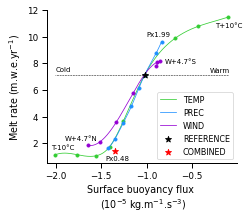

In [3]:
sns.set_context('paper')

# limit of y and x axis
Bminmax = np.array([FLXT_mean.Buoyancy.min(), FLXT_mean.Buoyancy.max()])
Mref = np.array([MeltT_tp.melt_mean[5], MeltT_tp.melt_mean[5]])

# colormap
color_TEMP = ['darkblue', 'royalblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'lightgreen', 'limegreen', 'darkgreen']
color_PREC = ['darkblue', 'royalblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'lightgreen', 'darkgreen']
color_WIND = ['darkblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'lightgreen', 'limegreen', 'darkgreen']
color_WINDT = ['darkblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'lightgreen', 'limegreen', 'darkgreen']

# add smooth line (interpolation)
xT = np.array(-FLXT_mean.Buoyancy)
yT = np.array(MeltT_tp.melt_mean)
xT_new = np.linspace(xT.min(), xT.max(), 300)
a_BSpline = make_interp_spline(xT, yT)
yT_new = a_BSpline(xT_new)

xP = np.array(-FLXP_mean.Buoyancy)
yP = np.array(MeltP_tp.melt_mean)
xP_new = np.linspace(xP.min(), xP.max(), 300)
a_BSpline = make_interp_spline(xP, yP)
yP_new = a_BSpline(xP_new)

xW = np.array(-FLXW_mean.Buoyancy[:-1])
yW = np.array(MeltW_tp.melt_mean[:-1])
xW_new = np.linspace(xW.min(), xW.max(), 300)
a_BSpline = make_interp_spline(xW, yW)
yW_new = a_BSpline(xW_new)

xWmax = np.array(-FLXW_mean.Buoyancy[5:])
yWmax = np.array(MeltW_tp.melt_mean[5:])

# figure
f = plt.figure(figsize = (3.54, 3.15))
ax={}
nb_rows = 1
nb_cols = 1

ax1 = f.add_subplot(nb_rows,nb_cols, 1)
ax1.plot(xT_new * 1e5, yT_new, linewidth = 0.75, linestyle = '-', color = 'limegreen', label='TEMP', zorder=1)
ax1.scatter(- FLXT_mean.Buoyancy * 1e5, MeltT_tp.melt_mean, s = 10, marker = 'o', color = 'limegreen', zorder=2)
ax1.plot(xP_new * 1e5, yP_new, linewidth = 0.75, linestyle = '-', color = 'dodgerblue', label='PREC', zorder=3)
ax1.scatter(- FLXP_mean.Buoyancy * 1e5, MeltP_tp.melt_mean, s = 10, marker = 'o', color = 'dodgerblue', zorder=4)
ax1.plot(xWmax * 1e5, yWmax, linewidth = 0.75, linestyle = '-', color = 'darkviolet',  label='WIND', zorder=5)
ax1.plot(xW_new * 1e5, yW_new, linewidth = 0.75, linestyle = '-', color = 'darkviolet', zorder=6)
ax1.scatter(- FLXW_mean.Buoyancy * 1e5, MeltW_tp.melt_mean, s = 10, marker = 'o', color = 'darkviolet', zorder=7)
ax1.scatter(- FLXT_mean.Buoyancy[5] * 1e5, MeltT_tp.melt_mean[5], s = 40, marker = '*', color = 'black',  label='REFERENCE', zorder=8)
ax1.scatter(- FLXTOT_mean.Buoyancy * 1e5, MeltTOT_tp.melt_mean, s = 40, marker = '*', color = 'red',  label='COMBINED', zorder=9)
ax1.plot(-Bminmax * 1e5, Mref, linewidth = 0.5, linestyle = '--', color = 'black')
ax1.set_xlabel('Surface buoyancy flux \n (10$^{-5}$ kg.m$^{-1}$.s$^{-3}$)')
ax1.set_ylabel('Melt rate (m.w.e.yr$^{-1}$)')
ax1.text(-2.05, 90 * 10**12 / 1000 / S, 'T-10°C', fontsize=7, color = 'black')
ax1.text(-0.25, 630 * 10**12 / 1000 / S, 'T+10°C', fontsize=7, color = "black")
ax1.text(-1.45, 42 * 10**12 / 1000 / S, 'Px0.48', fontsize=7, color = 'black')
ax1.text(-1.0, 590 * 10**12 / 1000 / S, 'Px1.99', fontsize=7, color = "black")
ax1.text(-1.9, 130 * 10**12 / 1000 / S, 'W+4.7°N', fontsize=7, color = 'black')
ax1.text(-0.8, 470 * 10**12 / 1000 / S, 'W+4.7°S', fontsize=7, color = "black")
ax1.text(-2.0, MeltT_tp.melt_mean[5] + 0.25, 'Cold', fontsize=7, color = 'black')
ax1.text(-0.3, MeltT_tp.melt_mean[5] + 0.2, 'Warm', fontsize=7, color = 'black')
#ax1.text(-2.05, 680 * 10**12 / 1000 / S, 'a)', fontsize=8, color = "black")
plt.legend(loc = 'lower right', prop={"size":8})

plt.tight_layout()
sns.despine()

# save file
plt.savefig('/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/RESULTS/B_flux.pdf')